# Example 101 (Interactive Mode)

The following basic example is written in interactive mode to show how trusspy works. *For mid-sized models it may be more convenient to use a Spreadsheet (Excel) - input file*. All model parameters except allowed incremental quantities are assumed with default values to enable a clean tutorial for the model creation process. We will consider a model with two nodes and one truss. Although this configuration does not include any geometric nonlinear effects it is the most basic example to start with. The left end of the truss (Node 1) is fixed whereas the right end displacement is free in direction x (Node 2). An external force acts on the right end of the truss in direction x. To sum up, this model contains two nodes, one element and one degree of freedom (DOF).

First we import trusspy with it’s own namespace and create a Model object M.

In [ ]:
!pip install trusspy

In [1]:
import trusspy as tp

# init model
M = tp.Model()


 _____                  ______      
|_   _|                 | ___ \     
  | |_ __ _   _ ___ ___ | |_/ /   _ 
  | | '__| | | / __/ __||  __/ | | |
  | | |  | |_| \__ \__ \| |  | |_| |
  \_/_|   \__,_|___/___/\_|   \__, |
                               __/ |
                              |___/ 

TrussPy - Truss Solver for Python
          Version 2.0.0

Dutzler Andreas, Graz University of Technology, 2023
        

# Initialize Model
* loading Managers

    - finished.



Now we create Nodes with coordinate triples and Elements with a list of node connectivities and both material and geometric properties. Both Nodes and Elements are identified with their label.

In [2]:
# create nodes
#
#    tp.Node( label,  coord  )
# ----------------------------
N1 = tp.Node(1, (0, 0, 0))
N2 = tp.Node(2, (1, 0, 0))

# create element
young = 1
area = 1
E1 = tp.Element(1, [1, 2], material_properties=[young], geometric_properties=[area])

**Mechanical boundary conditions** must be supplied for all nodes which contain locked DOF’s: `0 = inactive (locked)` and `1 = active (free)`. The same applies to external forces - no **External Force** object has to be added to the **Model** if all components of a node are zero.

In [3]:
# create displacement (U) boundary conditions
B1 = tp.BoundaryU(1, (0, 0, 0))
B2 = tp.BoundaryU(2, (1, 0, 0))

# create external forces
# F1 = tp.ExternalForce( 1, (0,0,0) ) # not necessary
F2 = tp.ExternalForce(2, (1, 0, 0))

We have to specify some important **Settings Parameters** concerning the trusspy path-tracing algorithm:

In [4]:
M.Settings.dlpf = 0.02  # maximum allowed incremental load-proportionality-factor
M.Settings.du = 0.02  # maximum allowed incremental displacement component
M.Settings.incs = 50  # maximum number of increments

All generated items have to be added to the model `M`. Of course this is cumbersome for bigger models. Alternativly, one may wrap for example the Node object creation inside the `node_add` function of the Model object: `M.Nodes.add_node(tp.Node(label, coord))`. Either way we are able to build the model and run the job afterwards. The nodal ordering of Nodes, Boundaries and Forces inside the corresponding add function doesn’t matter. TrussPy will sort all nodal quantities by their node labels in the build method.

In [5]:
# add items to the model
M.Nodes.add_nodes([N1, N2])
M.Elements.add_element(E1)
M.Boundaries.add_bounds_U([B1, B2])
M.ExtForces.add_forces([F2])

# build model and run job
M.build()
M.run()


# Model Summary
    Analysis Dimension      "ndim": 3
    Number of Nodes       "nnodes": 2
    Number of Elements    "nelems": 1
 
    System DOF              "ndof": 6
    active DOF             "ndof1": 1
    locked DOF             "ndof2": 5
 
    active DOF          "nproDOF1": [3]
    fixed  DOF          "nproDOF0": [0 1 2 4 5]
\pagebreak
 
# Run Simulation

## Summary of Analysis Parameters
|Description                          |Parameter|Value|
|:------------------------------------|:--------|:--|
|Maximum increments                   |   `incs`| 50 |
|Maximum increment recycles           |   `cycl`| 4 |
|Maximum Newton-Rhapson iterations    |   `nfev`| 8 |
|Maximum incremental displacement     |     `du`| 0.02 |
|Maximum incremental LPF              |   `dlpf`| 0.02 |
|Initial control component            |     `j0`| LPF|
|Locked control component             |`j_fixed`| False |
|Maximum incremental overshoot        |  `dxtol`| 1.000001 |
|Tolerance for x                     

When the job has finished we may post-process the deformed model and plot the force-displacement curve at Node 2.

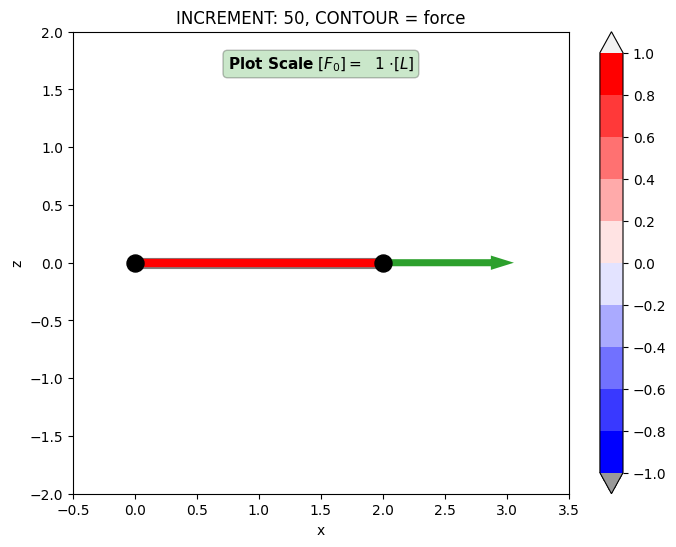

In [7]:
# show results
M.plot_model(
    view="xz",
    contour="force",
    lim_scale=(-0.5, 3.5, -2, 2),
    force_scale=1.0,
    inc=-1,
);

The deformed model with the current **External Force** vector acting on **Node** 2.

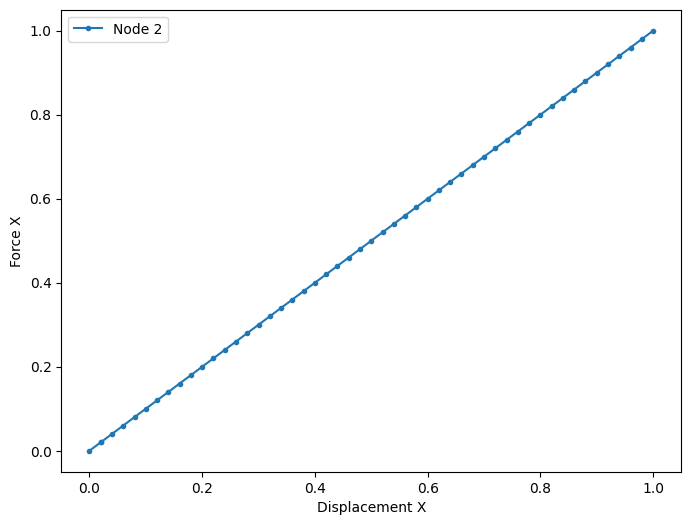

In [8]:
M.plot_history(nodes=[2, 2], X="Displacement X", Y="Force X");

The load-displacement curve for all increments at **Node** 2.

It could also be helpful to show the animated deformation process within a simple GIF file (options should be self-explaining). The resulting movie is saved to `figures/gif/movie.gif` whereas all deformed states are saved as `figures/png/fig_###.png`

In [9]:
# show results
M.plot_movie(
    view="xz",
    contour="force",
    lim_scale=(-0.5, 3.5, -2, 2),
    force_scale=1.0,
    cbar_limits=[-1, 1],
)

*Important Note*: A **LOT** of assumptions are made to run this model without specifying barely any parameter. Most important ones are incremental displacement values, incremental LPF value and the amount of increments to be solved. These critical parameters are responsible if the model solution will converge or not!